In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_csv(r"/content/car_age_price.csv")
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [ ]:
df.head(7)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000


In [ ]:
df.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


In [ ]:
df.shape

(112, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [ ]:
df.isna().sum()

Year     0
Price    0
dtype: int64

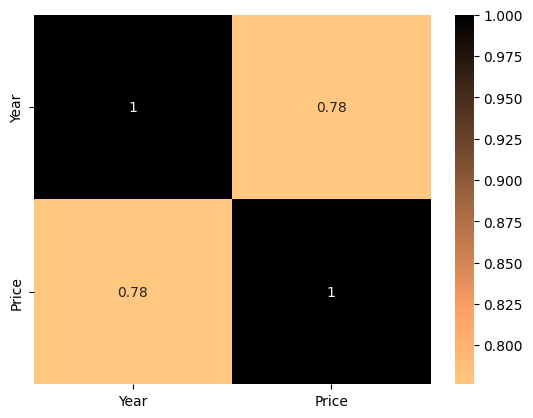

In [ ]:

#to check correlation plotting HEATMAP
sns.heatmap(df.corr(), annot=True, cmap="copper_r")
plt.show()

In [ ]:
y= df['Price']
X=df.drop('Price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=13)

In [ ]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([496868.32432733, 364377.95041139, 452704.86635536, 585195.2402713 ,
       585195.2402713 , 496868.32432733, 496868.32432733, 496868.32432733,
       541031.78229932, 408541.40838337, 496868.32432733, 629358.69824329,
       496868.32432733, 408541.40838337, 408541.40838337, 408541.40838337,
       320214.49243942, 496868.32432733, 496868.32432733, 496868.32432733,
       496868.32432733, 408541.40838337, 496868.32432733, 452704.86635536,
       496868.32432733, 320214.49243942, 408541.40838337, 408541.40838337])

In [ ]:
y_test

15     500000
56     341000
100    350000
43     550000
44     550000
57     550000
12     500000
23     550000
42     550000
67     400000
55     550000
39     545000
14     475000
84     325000
101    400000
72     300000
50     325000
92     520000
9      575000
27     550000
31     550000
79     400000
29     550000
59     550000
65     495000
53     345000
68     465000
60     490000
Name: Price, dtype: int64

In [ ]:
mean_squared_error(y_test, y_pred)

2991206082.051093

In [ ]:
r2_score(y_test, y_pred)

0.6158881227752928

In [ ]:
# Lasso Regression
L=Lasso()
L.fit(X_train,y_train)
y_pred_lasso = L.predict(X_test)
y_pred_lasso

array([496868.2402713 , 364379.04313987, 452705.17456082, 585194.37169224,
       585194.37169224, 496868.2402713 , 496868.2402713 , 496868.2402713 ,
       541031.30598177, 408542.10885035, 496868.2402713 , 629357.43740271,
       496868.2402713 , 408542.10885035, 408542.10885035, 408542.10885035,
       320215.9774294 , 496868.2402713 , 496868.2402713 , 496868.2402713 ,
       496868.2402713 , 408542.10885035, 496868.2402713 , 452705.17456082,
       496868.2402713 , 320215.9774294 , 408542.10885035, 408542.10885035])

In [ ]:
mean_squared_error(y_test, y_pred_lasso)

2991199639.5739713

In [ ]:
r2_score(y_test, y_pred_lasso)

0.6158889500776963

#From the above 2 regressions, the lasso regression is performing better than linear regression (only a slight differnce).
